In [1]:
from music_gan import audio
import matplotlib.pyplot as plt
import torchaudio as th_audio
import torch as th
import pywt
import numpy as np

In [2]:
#wav_p = "/run/media/samuel/M2_Sam_240GB/01 - 7 Minuets, K61b (65a) - I. G Major.flac"

wav_p = "/home/samuel/Musique/Korn_all_flac/01. Here To Stay.flac"

In [3]:
c_a = audio.wav_to_wavelets(wav_p, 64)

In [4]:
c_a = audio.prepare_wavelets(c_a, 256)

In [5]:
c_a.size()

torch.Size([46688, 1, 64, 256])

In [6]:
c_a = c_a.permute(1, 2, 0, 3).flatten(2, 3)[0, :].numpy()

In [7]:
print(c_a.max()), print(c_a.min())

2.112649
-2.2694268


(None, None)

In [8]:
c_a.shape

(64, 11952128)

In [9]:
mwf = pywt.ContinuousWavelet('morl', dtype=np.float32).wavefun()

In [34]:
dt = 1. / 44100.
y_00 = mwf[0][np.argmin(np.abs(mwf[1]))]
c_d = 0.776
dj = 0.125

In [42]:
real_sum = np.sum(c_a.T / np.arange(1, c_a.shape[0] + 1, dtype=np.float32) ** 0.5, axis=-1).T

In [46]:
x_n = real_sum * (dj * dt ** .5 / (c_d * y_00))

In [47]:
raw_audio.shape

(11952128,)

In [48]:
th_audio.save("test_cwt.mp3", th.from_numpy(raw_audio.astype(np.float32))[None, :], 44100)

In [7]:
audio.wavelets_to_wav(c_a, "./out_test_wavelet_funct.wav", 44100)

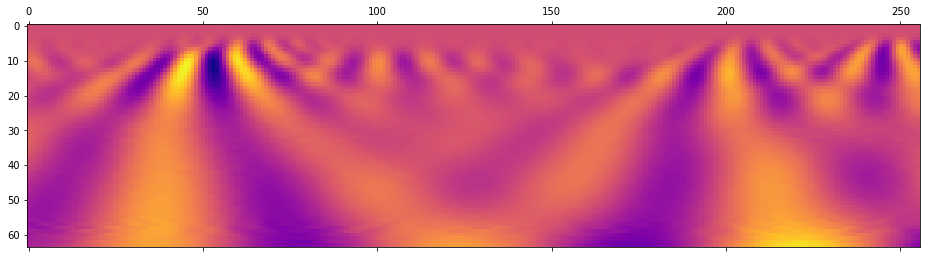

In [8]:
plt.matshow(c_a[100, 0], cmap="plasma")

# pywt

In [94]:
raw_audio, sr = th_audio.load(wav_p)
raw_audio_mono = raw_audio.mean(0)

In [95]:
raw_audio_mono.size()

torch.Size([11952276])

In [74]:
nb_vec = 16384

raw_audio_mono = raw_audio_mono[raw_audio_mono.size()[0] % nb_vec:]
raw_audio_mono = th.stack(raw_audio_mono.split(nb_vec, dim=0), dim=0)

In [75]:
raw_audio_mono.size()

torch.Size([729, 16384])

In [96]:
wavelet = "db16"
pywt.dwt_max_level(nb_vec, wavelet)

9

In [97]:
res = pywt.dwt(raw_audio_mono.numpy(), wavelet, mode="zero", axis=-1)

In [98]:
len(res)

2

In [99]:
for r in res:
    print(r.shape)

(5976153,)
(5976153,)


In [158]:
wavelet = "db1"

In [159]:
raw_audio_mono.size()

torch.Size([2918, 4096])

In [160]:
results = pywt.swt(raw_audio_mono.numpy(), wavelet, level=pywt.swt_max_level(nb_vec), axis=-1)

In [161]:
cA = np.stack([cA for cA, _ in results],axis=1)

In [162]:
cA.shape

(2918, 12, 4096)

In [163]:
idx = 1000

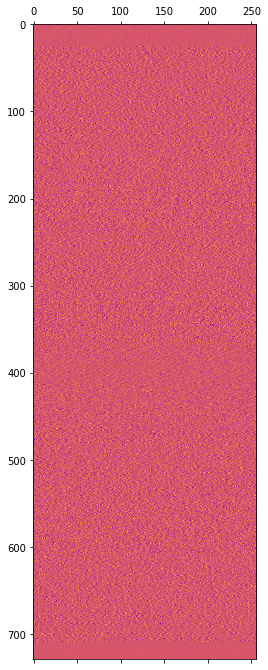

In [89]:
plt.matshow(res[-6], cmap="plasma")

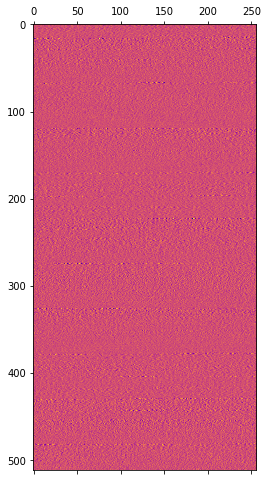

In [104]:
plt.matshow(cD[idx:idx+512, :], cmap="plasma")

In [114]:
res = pywt.idwt(cA, cD, wavelet, mode="zero", axis=-1)

In [115]:
res = res.reshape(-1)

In [116]:
th_audio.save("out_test_wavelet_cD-non-zeros.wav", th.from_numpy(res)[None, :], 44100)

# PyTorch wavelet

In [37]:
nb_vec = 1024

raw_audio_mono = raw_audio_mono[raw_audio_mono.size()[0] % nb_vec:]
raw_audio_mono = th.stack(raw_audio_mono.split(nb_vec, dim=0), dim=0)
raw_audio_mono = raw_audio_mono.unsqueeze(1)


raw_audio_mono.size()

torch.Size([5211, 1, 1024])

In [41]:
res, l = wavelets_forward(raw_audio_mono)

In [49]:
res_transformed = res[res.size()[0]%512:]
res_transformed = th.stack(res_transformed.split(512, dim=0), dim=0).permute(0, 2, 1, 3)

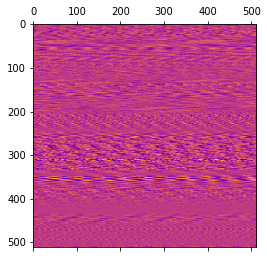

In [50]:
plt.matshow(res_transformed[5, 0], cmap="plasma")

In [47]:
res_transformed.size()

torch.Size([10, 1, 512, 512])

In [6]:
cplx_values = audio.wav_to_stft(
    wav_p
)

In [7]:
magn, phase = audio.stft_to_phase_magn(cplx_values)

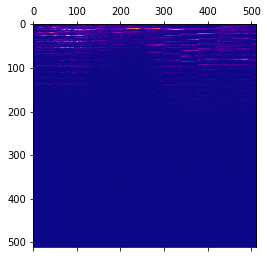

In [10]:
plt.matshow(magn[20], cmap="plasma")

# CWT

In [8]:
wav_p = "/home/samuel/Musique/Korn_all_flac/01. Here To Stay.flac"

In [9]:
raw_audio, _ = th_audio.load(wav_p)

In [10]:
raw_audio_mean = raw_audio.mean(0).numpy()

In [11]:
raw_audio_mean.shape

(11952276,)

In [20]:
res_1, res_2 = pywt.cwt(raw_audio_mean[200000:400000], list(range(1, 513)), "morl", sampling_period=1. / 44100., method="conv")

In [21]:
res_1.shape

(512, 200000)

In [22]:
res_2.shape

(512,)

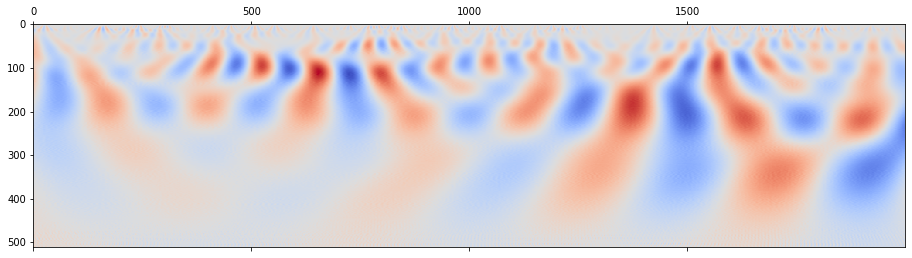

In [23]:
plt.matshow(res_1[:, 102000:104000], cmap="coolwarm")

In [24]:
res_1.shape

(512, 200000)